In [34]:
from pymongo import MongoClient
from datetime import datetime
import pandas as pd

### MongoDB

In [35]:
uri = 'mongodb://localhost/'
db = MongoClient(uri)['vendas']

# Recomendação de produtos - Algoritmos Apriori

In [36]:
# dados de 1 ano
d = datetime.now()
cur = db['venda_pedido'].find({'horario':  {'$gte': datetime(d.year - 1, d.month, d.day)}})

qtd = db['venda_estoque'].count_documents({})
pedi = []
for ped in cur:
  itens = []
  for prod in ped['itens_pedido']:
    id = prod['id']
    while len(itens) < id - 1: itens.append(' - ')
    itens.append(f'P{id:02}')
  while len(itens) < qtd: itens.append(' - ')
  pedi.append(itens)

In [37]:
# visualizar
for a in pedi:
  print(a)

[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P19', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P21', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P21', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P29']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P24', ' - ', ' - ', ' - ', ' - ', ' - ']
[' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', ' - ', 'P22', ' - ', ' - ', 'P25', ' - ', '

In [38]:
from apyori import apriori
# regras = list(apriori(pedi, min_support = 0.0006, min_confidence = 0.3, min_lift = 1))
# regras = list(apriori(pedi, min_support = 0.001, min_confidence = 0.1, min_lift = 1))
regras = list(apriori(pedi, min_support = 0.0008, min_confidence = 0.1, min_lift = 1))
# regras = list(apriori(pedi, min_support = 0.0001, min_confidence = 0, min_lift = 0))
# regras = list(apriori(pedi, min_support = 0.00069, min_confidence = 0, min_lift = 0))

it_a = []
it_b = []
# rule = []
supo = []
conf = []
lift = []
for regra in regras:
  for item in regra[2]:
    if ' - ' not in item[0] and ' - ' not in item[1]:
      # rule.append(f"{', '.join(item[0])} > {', '.join(item[1])}")
      it_a.append(','.join(sorted(item[0])))
      it_b.append(','.join(sorted(item[1])))
      supo.append(regra[1])
      conf.append(item[2])
      lift.append(item[3])

df_apriori = pd.DataFrame({
  'item_a': it_a, 
  'item_b': it_b, 
  # 'regra': rule, 
  'suporte': supo, 
  'confianca': conf, 
  'lift': lift
}).sort_values(
  by = ['lift', 'confianca', 'suporte'], 
  ascending = False).reset_index()
df_apriori


,index,item_a,item_b,suporte,confianca,lift
0,53,"P12,P26",P07,0.001403,1.000000,54.846154
1,52,"P07,P26",P12,0.001403,0.666667,38.026667
2,47,"P20,P27",P02,0.001403,0.181818,18.519481
3,44,P02,"P20,P27",0.001403,0.142857,18.519481
4,51,"P07,P12",P26,0.001403,1.000000,18.050633
...,...,...,...,...,...,...
150,1,,P20,0.167602,0.167602,1.000000
151,0,,P19,0.163394,0.163394,1.000000
152,4,,P23,0.162693,0.162693,1.000000
153,5,,P24,0.154278,0.154278,1.000000


In [39]:
i = 0
j = i + 60
df_apriori[i:j]

,index,item_a,item_b,suporte,confianca,lift
0,53,"P12,P26",P07,0.001403,1.000000,54.846154
1,52,"P07,P26",P12,0.001403,0.666667,38.026667
2,47,"P20,P27",P02,0.001403,0.181818,18.519481
3,44,P02,"P20,P27",0.001403,0.142857,18.519481
4,51,"P07,P12",P26,0.001403,1.000000,18.050633
5,147,"P21,P26","P23,P24",0.001403,0.142857,12.732143
6,148,"P23,P24","P21,P26",0.001403,0.125000,12.732143
7,151,"P21,P23,P24",P26,0.001403,0.666667,12.033755
8,150,"P24,P26","P21,P23",0.001403,0.333333,11.593496
9,60,P16,"P21,P23",0.002104,0.214286,7.452962


In [40]:
df_apriori.to_dict('records')

[{'index': 53,
  'item_a': 'P12,P26',
  'item_b': 'P07',
  'suporte': 0.001402524544179523,
  'confianca': 1.0,
  'lift': 54.84615384615385},
 {'index': 52,
  'item_a': 'P07,P26',
  'item_b': 'P12',
  'suporte': 0.001402524544179523,
  'confianca': 0.6666666666666666,
  'lift': 38.026666666666664},
 {'index': 47,
  'item_a': 'P20,P27',
  'item_b': 'P02',
  'suporte': 0.001402524544179523,
  'confianca': 0.18181818181818182,
  'lift': 18.51948051948052},
 {'index': 44,
  'item_a': 'P02',
  'item_b': 'P20,P27',
  'suporte': 0.001402524544179523,
  'confianca': 0.14285714285714285,
  'lift': 18.51948051948052},
 {'index': 51,
  'item_a': 'P07,P12',
  'item_b': 'P26',
  'suporte': 0.001402524544179523,
  'confianca': 1.0,
  'lift': 18.050632911392405},
 {'index': 147,
  'item_a': 'P21,P26',
  'item_b': 'P23,P24',
  'suporte': 0.001402524544179523,
  'confianca': 0.14285714285714285,
  'lift': 12.732142857142858},
 {'index': 148,
  'item_a': 'P23,P24',
  'item_b': 'P21,P26',
  'suporte': 0.

In [41]:
db['venda_apriori'].delete_many({})
db['venda_apriori'].insert_many(df_apriori.to_dict('records'))

InsertManyResult([ObjectId('66449a94f5bbcc89ce031a99'), ObjectId('66449a94f5bbcc89ce031a9a'), ObjectId('66449a94f5bbcc89ce031a9b'), ObjectId('66449a94f5bbcc89ce031a9c'), ObjectId('66449a94f5bbcc89ce031a9d'), ObjectId('66449a94f5bbcc89ce031a9e'), ObjectId('66449a94f5bbcc89ce031a9f'), ObjectId('66449a94f5bbcc89ce031aa0'), ObjectId('66449a94f5bbcc89ce031aa1'), ObjectId('66449a94f5bbcc89ce031aa2'), ObjectId('66449a94f5bbcc89ce031aa3'), ObjectId('66449a94f5bbcc89ce031aa4'), ObjectId('66449a94f5bbcc89ce031aa5'), ObjectId('66449a94f5bbcc89ce031aa6'), ObjectId('66449a94f5bbcc89ce031aa7'), ObjectId('66449a94f5bbcc89ce031aa8'), ObjectId('66449a94f5bbcc89ce031aa9'), ObjectId('66449a94f5bbcc89ce031aaa'), ObjectId('66449a94f5bbcc89ce031aab'), ObjectId('66449a94f5bbcc89ce031aac'), ObjectId('66449a94f5bbcc89ce031aad'), ObjectId('66449a94f5bbcc89ce031aae'), ObjectId('66449a94f5bbcc89ce031aaf'), ObjectId('66449a94f5bbcc89ce031ab0'), ObjectId('66449a94f5bbcc89ce031ab1'), ObjectId('66449a94f5bbcc89ce031a

# Predição com Prophet

In [42]:
# # dados de 1 ano
# d = datetime.now()
# cur = db['venda_pedido'].find({'horario':  {'$gte': datetime(d.year - 1, d.month, d.day)}})
cur = db['venda_pedido'].find()

df_prophet = pd.DataFrame(cur)[['horario', 'total']].rename(columns={'horario': 'ds', 'total': 'y'}).sort_values(['ds'])
df_prophet

,ds,y
0,2021-01-01 10:31:00,3802.78
1,2021-01-02 09:16:00,8109.34
2,2021-01-02 11:30:00,115.18
3,2021-01-02 21:43:00,280.00
5,2021-01-03 14:43:00,8281.99
...,...,...
4815,2024-05-14 10:18:00,362.50
4816,2024-05-14 19:29:00,6620.63
4814,2024-05-14 21:09:00,9545.74
4819,2024-05-15 07:53:00,3080.00


In [43]:
from prophet import Prophet

m = Prophet()
m.fit(df_prophet)

08:20:53 - cmdstanpy - INFO - Chain [1] start processing
08:20:53 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
5180,2025-05-11 08:07:00
5181,2025-05-12 08:07:00
5182,2025-05-13 08:07:00
5183,2025-05-14 08:07:00
5184,2025-05-15 08:07:00


In [45]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5180,2025-05-11 08:07:00,3905.571864,-1903.384021,9188.509144
5181,2025-05-12 08:07:00,3792.403157,-1682.868068,9103.127604
5182,2025-05-13 08:07:00,3640.156530,-1545.322604,9099.271307
5183,2025-05-14 08:07:00,4198.100443,-1098.953367,9793.138283
5184,2025-05-15 08:07:00,3969.525552,-1431.130342,9282.414683


/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


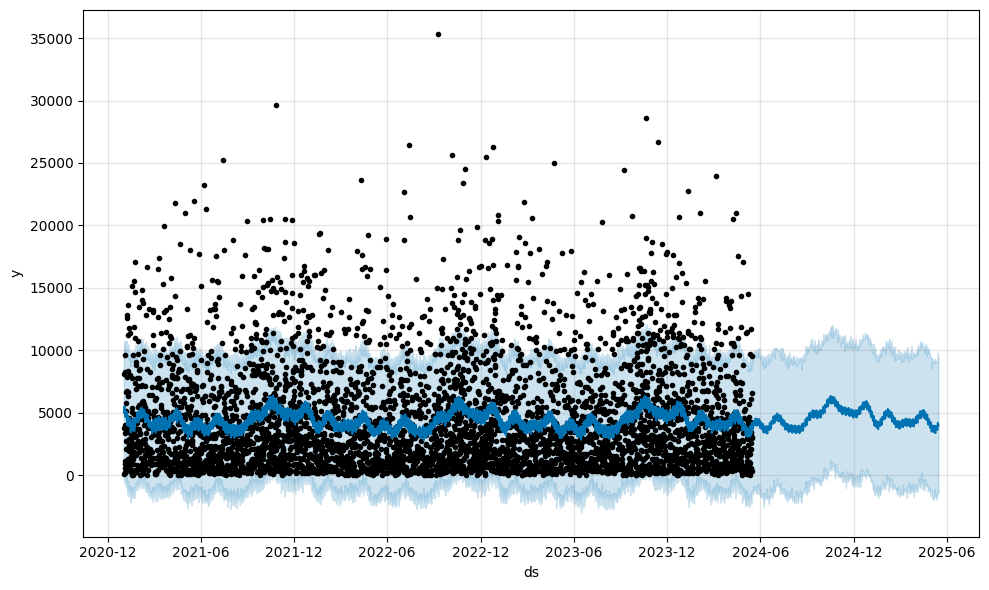

In [46]:
fig1 = m.plot(forecast)

/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/oscar/.local/lib/python3.10/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the o

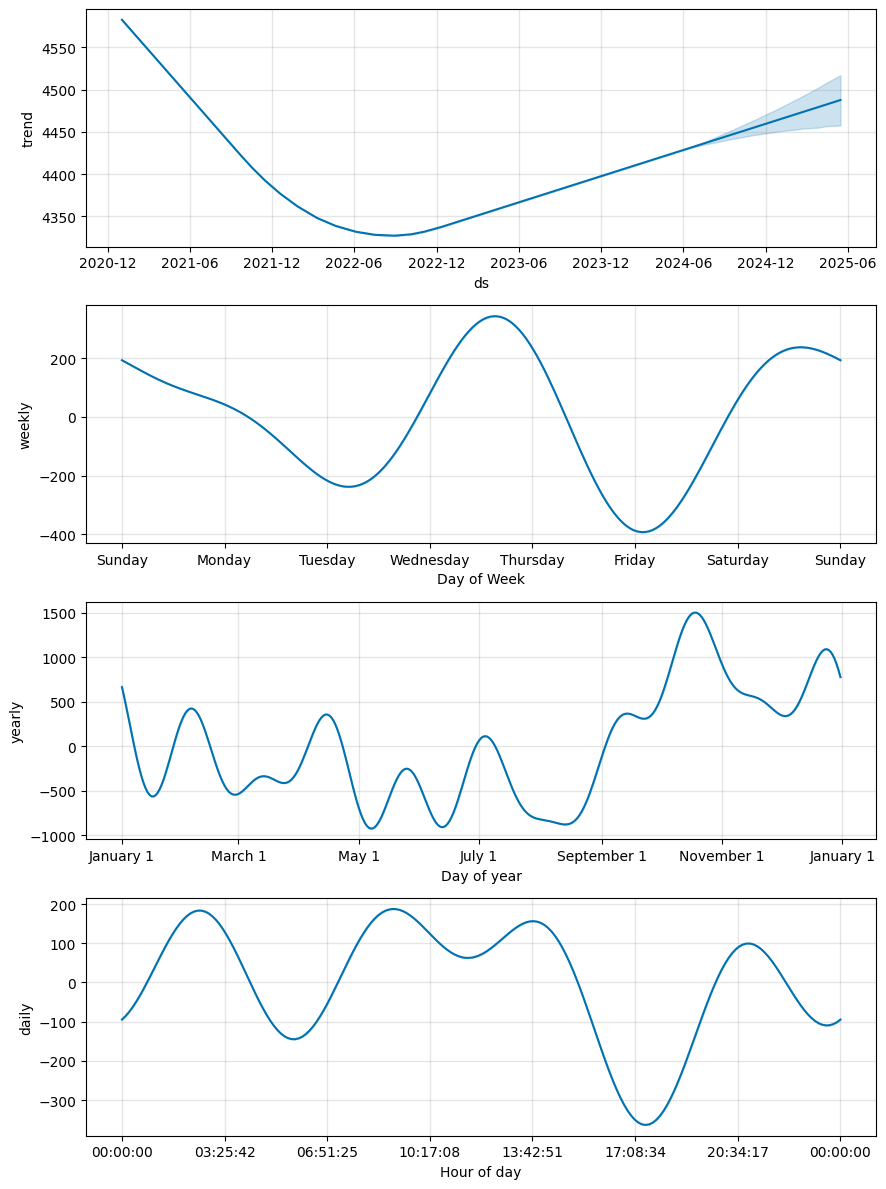

In [47]:
fig2 = m.plot_components(forecast)

In [48]:
fig1.savefig('../home/static/fig1.png')
fig2.savefig('../home/static/fig2.png')